# Forecasting Ocean Freight Export Volume

__Facebook Prophet Model and Bill of Lading Data to forecast container export volume from one of China's fastest growing port cities__

__Motivation__

Forecasting is a data science task that is central to many activities within any organization. 
Large organizations like those that run large international ports, global shipping carriers and importers of products must engage in 
capacity planning to efficiently allocate scarce resources and goal setting in order to measure performance relative to a baseline. 
Producing high quality forecasts is not an easy problem to solve but in this project I attempt to do just that.

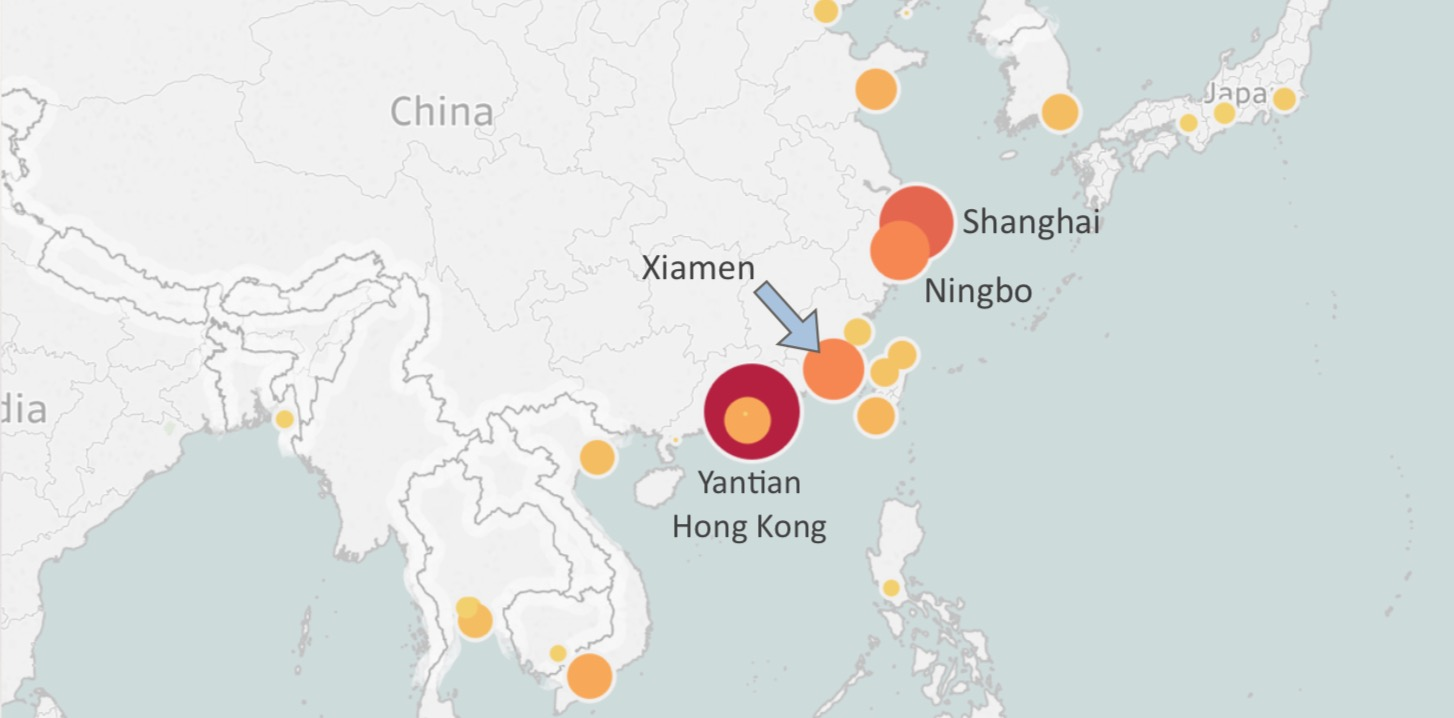

__Data__

The data I gathered was the last __5 years of USA Bill of Lading import records from Enigma Public__ (https://public.enigma.com/) a great source for datasets.
I used all the records available which were from __2014-2018__ consisting of __over 100 million shipments__ or observations. Some of the data fields include
port of origin, carrier vessel name, destination, arrival date, harmonized tax code and text description of container contents.

The raw api records are in json and the full total datasets are available through the enigma public api but I chose to filter down to use just records from the largest port in the USA, the Port of Los Angeles.
This made the files smaller to about 3.5 GB per year and filtered from 30+ million rows to about 18 million per year. I was able to download each year separately as csv files and then to store and work with them
I __created a PostgreSQL database and tables.__ 

__Data Cleaning__

During initial EDA, my first query searching for the top 10 ports of origin I found that the port Yantian appeared in the top 10 three times revealing a __significant need for regex cleaning.__ 
I cleaned most columns with __queries in the PostgreSQL tables__ for each year. 

__Exploratory Data Analysis & Stats__

Pulling and plotting the counts of each port of origin shows a vast majority of USA imports come from Asia and China specifically. 
Top Imports
Furniture
Auto Parts
Apparel
Electronics
Footwear

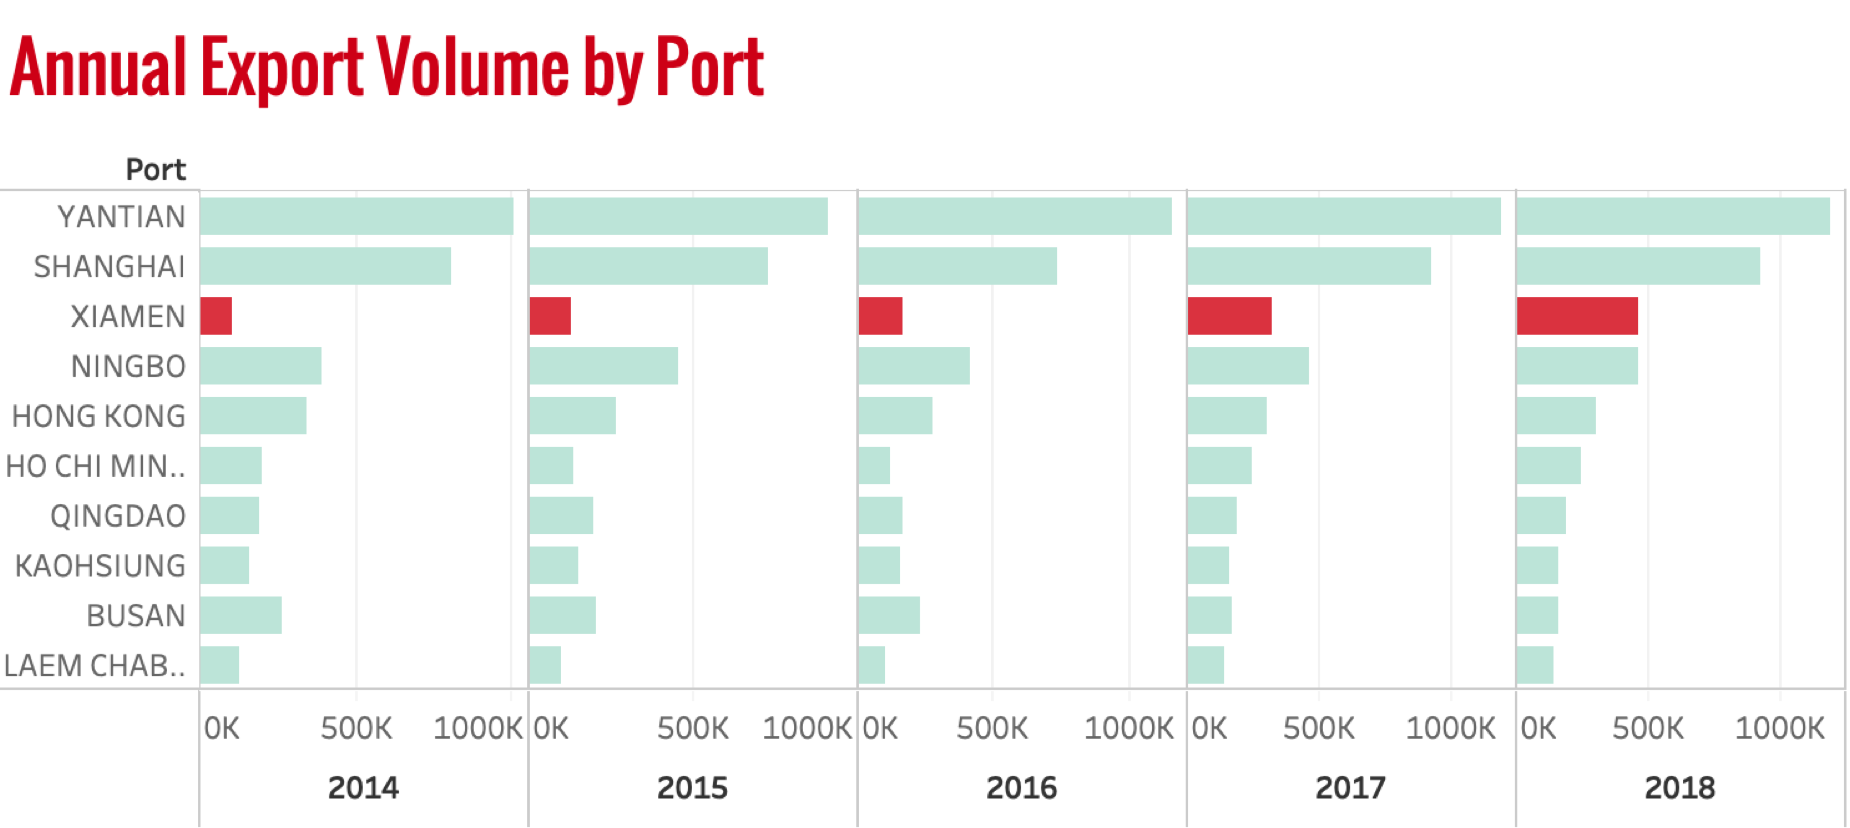

__Xiamen deeper dive__

In the __top 10 export volume by port bar chart above__, when I sorted the chart values by the most recent year 2018, __we see Xiamen in only 4 years went from outside the top 10 to number 3 exporter.__
The other ports remain stagnant in their relative places and export volumes but Xiamen stood out. Naturally I googled Port of Xiamen to discover more and found __Xiamen became a Free Trade Zone (FTZ)__ test site in April 21st 2015.

A FTZ is a geographic area where goods may be landed, stored, handled, manufactured and re-exported, generally not subject to customs duty. Duties can be as high as 15-35% and with the recent "trade war" and change in presidency sites like FTZs are that much more valuable.
 The FTZ status could be a major factor in the explosive growth in Xiamen export volume. 


__With such high growth, can we still accurately forecast volume?__

For the forecast model I used FB Prophet because it is super easy to use and gets a pretty accurate model accounting for seasonality, historical trend changes and handling of any missing dates "right out of the box".
I binned the counts of distinct containers per day and created a dataframe with days in datetime format in one column as "ds" and container count per day as target "y" in the other for use in time series modeling. 

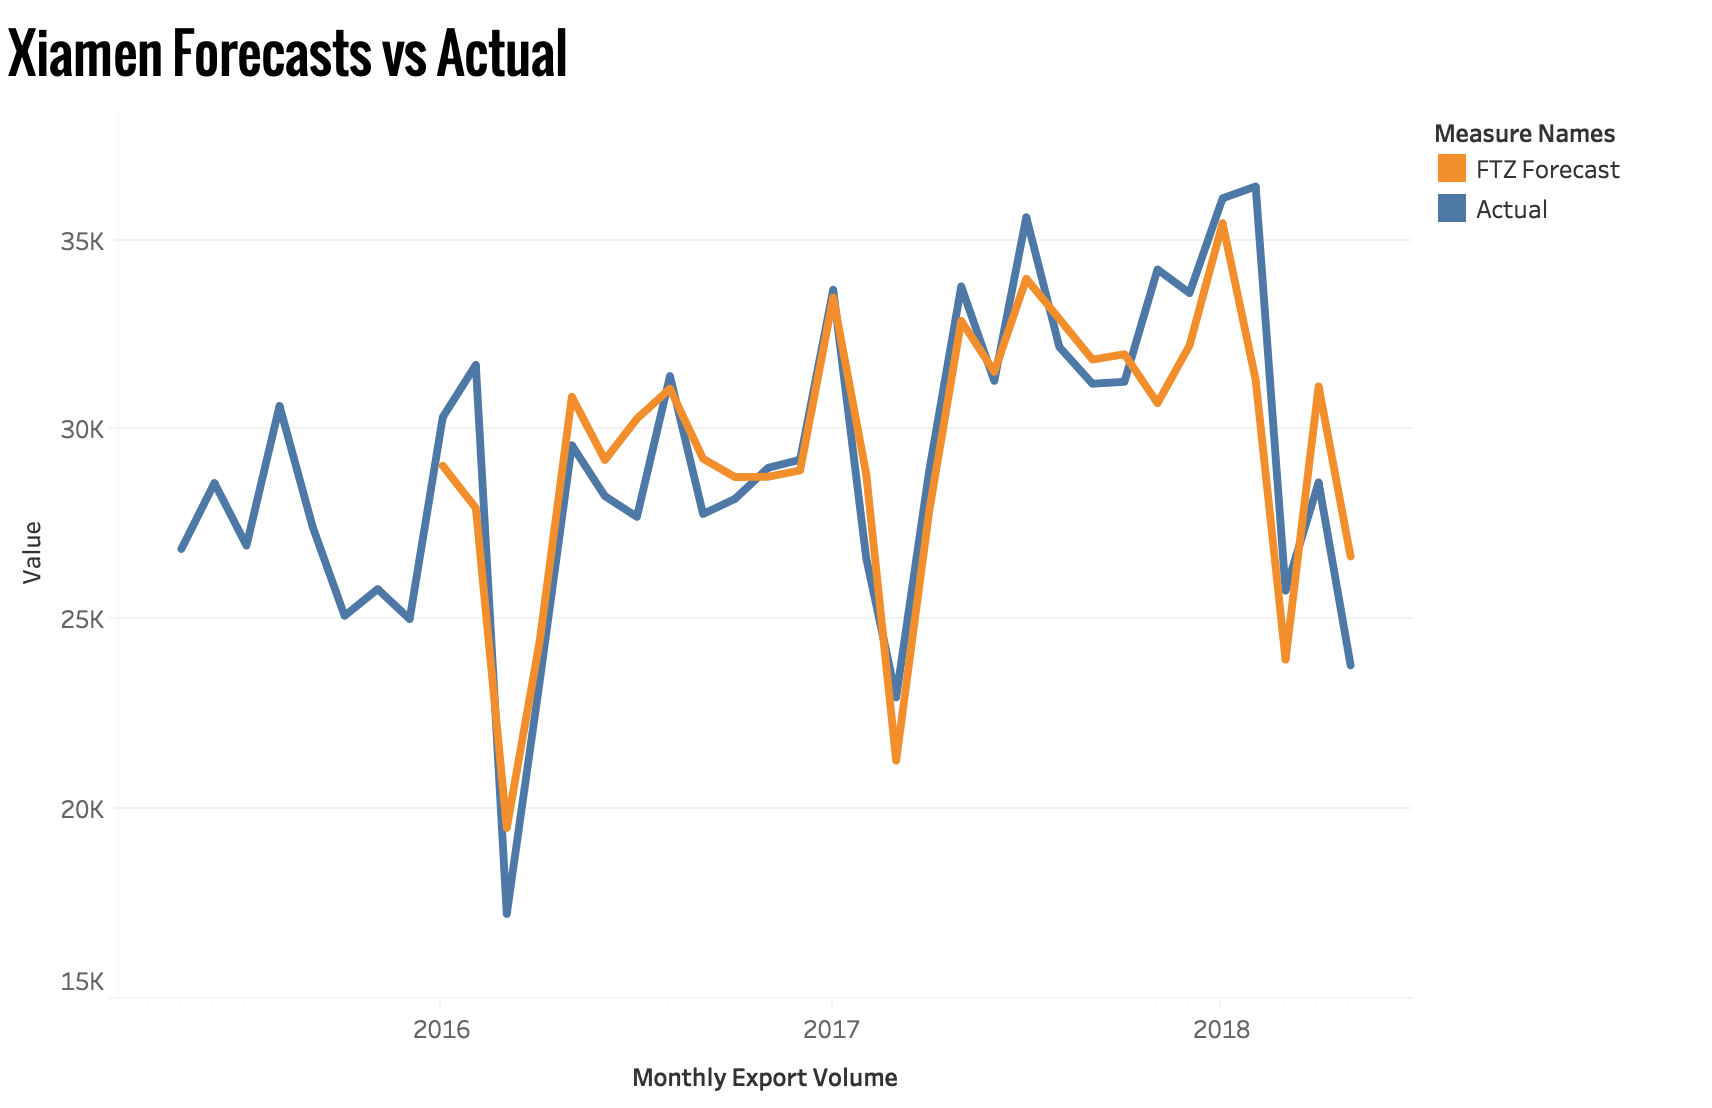

There were 1609 dates and container counts in the df
Parameters used were yearly seasonality and holidays to account for annual trends in the shipping industry. FB Prophet model allows for easy built in holiday inclusion with a country code CN for China. Also a prior scale and linear growth were used. 
I trained the model on the first two years of my data set and used the other two and a half years as my test set. The model uses a moving average and auto regression to predict and it did quite well.